<a href="https://colab.research.google.com/github/montesinos8/TFM_48763797W_Predicci-n-de-accidentes-en-el-rea-Metropolitana-de-Madrid/blob/main/FORECASTING_LGBM_DIAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.2/934.2 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.5/273.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.5 MB/s eta 0:00:

In [ ]:
pip install skforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.5/670.5 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os
import re
import numpy as np


from statsmodels.tsa.stattools import adfuller, kpss
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from skforecast.plot import plot_residuals
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff

plt.style.use('seaborn-v0_8')
#plt.style.use('ggplot')


import skforecast
import lightgbm
import sklearn
from lightgbm import LGBMRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import bayesian_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import select_features
import shap

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




In [ ]:
file_path = '/content/drive/My Drive/TFM/csv_tfm/ACCIDENTES_D_DB.csv'

accidentes_df= pd.read_csv(file_path, sep=',')
accidentes_df =accidentes_df.sort_values(by='FECHA')
accidentes_df

,FECHA,NUM_ACCIDENTES,TMEDIA,PRECIPITACION,RACHA,FESTIVO,CONFINAMIENTO,RESTRICCION_HORARIA,RESTRICCION_TERRITORIAL,NUM_VEHICULOS
0,2010-01-01,52,5.566667,0.050000,18.233333,1,0,0,0,4307658.0
1,2010-01-02,42,4.900000,0.000000,6.200000,0,0,0,0,4307658.0
2,2010-01-03,46,5.100000,5.250000,5.550000,0,0,0,0,4307658.0
3,2010-01-04,70,7.775000,8.350000,6.700000,0,0,0,0,4307658.0
4,2010-01-05,46,8.150000,0.566667,6.750000,0,0,0,0,4307658.0
...,...,...,...,...,...,...,...,...,...,...
5108,2023-12-27,138,4.500000,0.000000,3.875000,0,0,0,0,5400000.0
5109,2023-12-28,93,3.575000,0.000000,3.433333,0,0,0,0,5400000.0
5110,2023-12-29,98,5.400000,0.000000,5.000000,0,0,0,0,5400000.0
5111,2023-12-30,130,6.000000,0.000000,4.875000,0,0,0,0,5400000.0


In [ ]:
accidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FECHA                    5113 non-null   object 
 1   NUM_ACCIDENTES           5113 non-null   int64  
 2   TMEDIA                   5113 non-null   float64
 3   PRECIPITACION            5113 non-null   float64
 4   RACHA                    5113 non-null   float64
 5   FESTIVO                  5113 non-null   int64  
 6   CONFINAMIENTO            5113 non-null   int64  
 7   RESTRICCION_HORARIA      5113 non-null   int64  
 8   RESTRICCION_TERRITORIAL  5113 non-null   int64  
 9   NUM_VEHICULOS            5113 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 399.6+ KB


In [ ]:
accidentes_df['FECHA'] = pd.to_datetime(accidentes_df['FECHA'])
accidentes_df.set_index('FECHA', inplace=True)
accidentes_df=accidentes_df.asfreq('D')
accidentes_df=accidentes_df.sort_index()
accidentes_df




,NUM_ACCIDENTES,TMEDIA,PRECIPITACION,RACHA,FESTIVO,CONFINAMIENTO,RESTRICCION_HORARIA,RESTRICCION_TERRITORIAL,NUM_VEHICULOS
FECHA,,,,,,,,,
2010-01-01,52,5.566667,0.050000,18.233333,1,0,0,0,4307658.0
2010-01-02,42,4.900000,0.000000,6.200000,0,0,0,0,4307658.0
2010-01-03,46,5.100000,5.250000,5.550000,0,0,0,0,4307658.0
2010-01-04,70,7.775000,8.350000,6.700000,0,0,0,0,4307658.0
2010-01-05,46,8.150000,0.566667,6.750000,0,0,0,0,4307658.0
...,...,...,...,...,...,...,...,...,...
2023-12-27,138,4.500000,0.000000,3.875000,0,0,0,0,5400000.0
2023-12-28,93,3.575000,0.000000,3.433333,0,0,0,0,5400000.0
2023-12-29,98,5.400000,0.000000,5.000000,0,0,0,0,5400000.0


verificar si esta la serie completa

In [ ]:
fecha_inicio = accidentes_df.index.min()
fecha_fin = accidentes_df.index.max()
date_range_completo = pd.date_range(start=fecha_inicio, end=fecha_fin, freq=accidentes_df.index.freq)
print(f"Índice completo: {(accidentes_df.index == date_range_completo).all()}")
print(f"Filas con valores ausentes: {accidentes_df.isnull().any(axis=1).mean()}")


Índice completo: True
Filas con valores ausentes: 0.0


## Estudio de datos serie completa

In [ ]:
accidentes_df['Año'] = accidentes_df.index.year
media_anual = accidentes_df.groupby('Año')['NUM_ACCIDENTES'].mean()
print(media_anual)


Año
2010     72.816438
2011     74.909589
2012     73.721311
2013     73.531507
2014     76.621918
2015     77.183562
2016     79.784153
2017     81.630137
2018     82.526027
2019    141.947945
2020     88.614754
2021    114.473973
2022    128.912329
2023    133.780822
Name: NUM_ACCIDENTES, dtype: float64


In [ ]:
# Media de accidentes por día de la semana
accidentes_df['Dia_Semana'] = accidentes_df.index.dayofweek + 1
media_dia_semana = accidentes_df.groupby('Dia_Semana')['NUM_ACCIDENTES'].mean()
print("Media de accidentes por día de la semana:")
print(media_dia_semana)

# Media de accidentes por mes
accidentes_df['Mes'] = accidentes_df.index.month
media_mes = accidentes_df.groupby('Mes')['NUM_ACCIDENTES'].mean()
print("\nMedia de accidentes por mes:")
print(media_mes)


Media de accidentes por día de la semana:
Dia_Semana
1     90.542466
2     96.164384
3     98.078082
4     99.119178
5    110.465116
6     82.616963
7     73.207934
Name: NUM_ACCIDENTES, dtype: float64

Media de accidentes por mes:
Mes
1      86.629032
2      98.369620
3      90.133641
4      85.707143
5      94.345622
6     101.026190
7      88.122120
8      60.223502
9      95.576190
10    106.686636
11    106.571429
12    102.251152
Name: NUM_ACCIDENTES, dtype: float64


## Exploración gráfica

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=accidentes_df.index, y=accidentes_df['NUM_ACCIDENTES'], mode='lines', name='Accidentes'))
fig.update_layout(title='Número de Accidentes Diarios', xaxis_title='Fecha', yaxis_title='Número de Accidentes')
fig.show()


In [ ]:
accidentes_df = accidentes_df.copy()
accidentes_df = accidentes_df.loc['2010-01-01': '2023-12-31'].copy()
fin_train = '2019-12-31'
ini_val = '2020-01-01'
fin_val = '2022-12-31'
ini_test = '2023-01-01'
accidentes_df_train = accidentes_df.loc[: fin_train, :].copy()
accidentes_df_val   = accidentes_df.loc[ini_val:fin_val, :].copy()
accidentes_df_test  = accidentes_df.loc[ini_test:, :].copy()
print(f"Fechas train      : {accidentes_df_train.index.min()} --- {accidentes_df_train.index.max()}")
print(f"Fechas validacion : {accidentes_df_val.index.min()} --- {accidentes_df_val.index.max()}")
print(f"Fechas test       : {accidentes_df_test.index.min()} --- {accidentes_df_test.index.max()}")

Fechas train      : 2010-01-01 00:00:00 --- 2019-12-31 00:00:00
Fechas validacion : 2020-01-01 00:00:00 --- 2022-12-31 00:00:00
Fechas test       : 2023-01-01 00:00:00 --- 2023-12-31 00:00:00


In [ ]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=accidentes_df_train.index, y=accidentes_df_train['NUM_ACCIDENTES'], mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=accidentes_df_val.index, y=accidentes_df_val['NUM_ACCIDENTES'], mode='lines', name='Validation'))
fig.add_trace(go.Scatter(x=accidentes_df_test.index, y=accidentes_df_test['NUM_ACCIDENTES'], mode='lines', name='Test'))
fig.update_layout(
    title  = 'Número de Accidentes Diarios',
    xaxis_title='Fecha',
    yaxis_title='Número de Accidentes',
    legend_title="Partición:",
    width=850,
    height=400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1,
        xanchor="left",
        x=0.001
    )
)

fig.show()

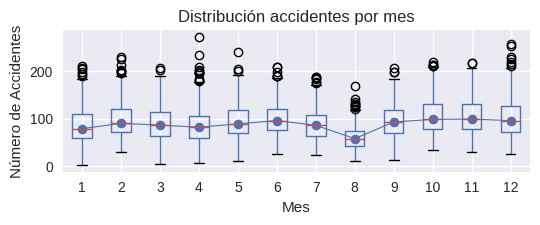

In [ ]:

# Distribución de la demanda por mes

fig, ax = plt.subplots(figsize=(5.5, 2.5))
accidentes_df['mes'] = accidentes_df.index.month
accidentes_df.boxplot(column='NUM_ACCIDENTES', by='mes', ax=ax,)
accidentes_df.groupby('mes')['NUM_ACCIDENTES'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Número de Accidentes')
ax.set_title('Distribución accidentes por mes')
ax.set_xlabel('Mes')
plt.suptitle("")
plt.tight_layout()
plt.show()


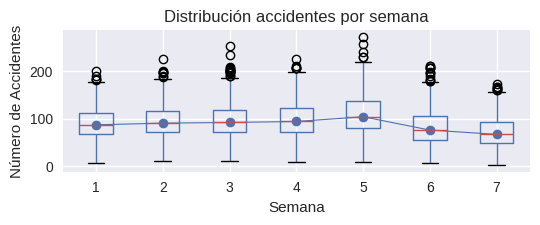

In [ ]:

# Distribución de la demanda por semana

fig, ax = plt.subplots(figsize=(5.5, 2.5))
accidentes_df['semana'] = accidentes_df.index.day_of_week + 1
accidentes_df.boxplot(column='NUM_ACCIDENTES', by='semana', ax=ax,)
accidentes_df.groupby('semana')['NUM_ACCIDENTES'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Número de Accidentes')
ax.set_title('Distribución accidentes por semana')
ax.set_xlabel('Semana')
plt.suptitle("")
plt.tight_layout()
plt.show()


## Gráficos de autocorrelación

Los gráficos de autocorrelación muestran la correlación entre una serie temporal y sus valores pasados. Son una herramienta útil para identificar el orden de un modelo autorregresivo, es decir, los valores pasados (lags) que se deben incluir en el modelo.

La función de autocorrelación (ACF) mide la correlación entre una serie temporal y sus valores pasados. La función de autocorrelación parcial (PACF) mide la correlación entre una serie temporal y sus valores pasados, pero solo después de eliminar las variaciones explicadas por los valores pasados intermedios.

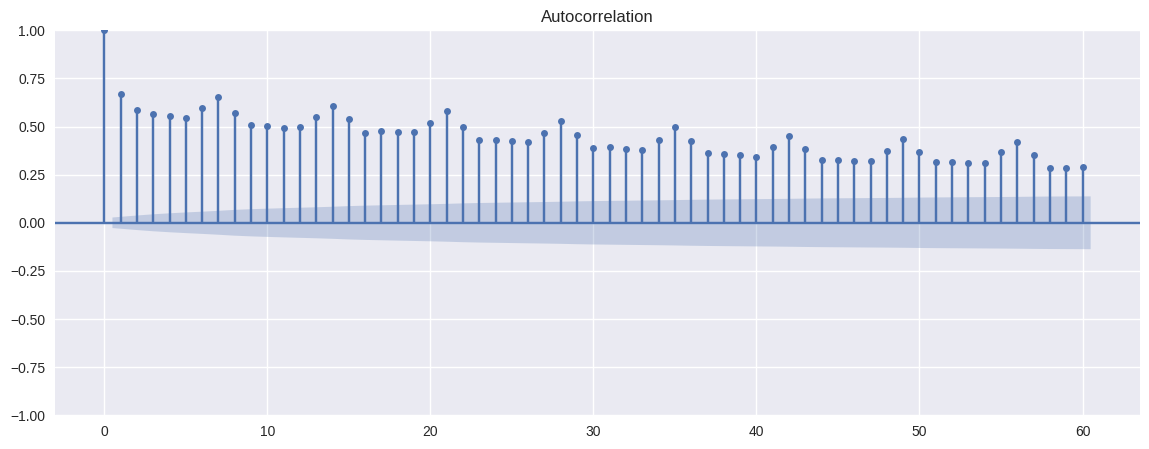

In [ ]:
# Gráfico autocorrelación
# ==============================================================================
fig, ax = plt.subplots(figsize=(14, 5))
plot_acf(accidentes_df.NUM_ACCIDENTES, ax=ax, lags=60)
plt.show()


*   primer valor alto y despues desciende, por lo que el valor anterior tiene influencia directa con el siguiente.
*   se ve estacionalidad semanal, coincide el punto mas alto
*   todos los valores fuera dek intervalo de confianza por lo que son fiables estadisticamente hablando.




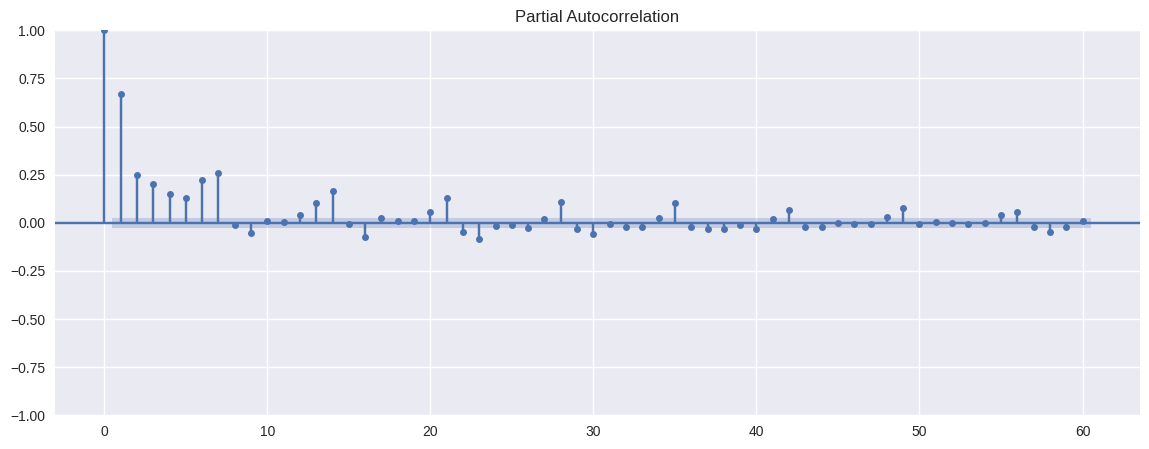

In [ ]:
# Gráfico autocorrelación
# ==============================================================================
fig, ax = plt.subplots(figsize=(14, 5))
plot_pacf(accidentes_df.NUM_ACCIDENTES, ax=ax, lags=60)
plt.show()

*   primer valor alto y despues desciende, por lo que el valor anterior tiene influencia directa con el siguiente.
*   despues de los primeros dias disminuye mucho, por lo que pierrde la influencia directa totalmente
*  algunos valores dentro dek intervalo de confianza.


#**Baseline**

Al enfrentarse a un problema de forecasting, es recomendable disponer de un modelo de referencia (baseline). Suele tratarse de un modelo muy sencillo que puede utilizarse como referencia para evaluar si merece la pena aplicar modelos más complejos.

Skforecast permite crear fácilmente un modelo de referencia con su clase ForecasterEquivalentDate. Este modelo, también conocido como Seasonal Naive Forecasting, simplemente devuelve el valor observado en el mismo periodo de la temporada anterior (por ejemplo, el mismo día laboral de la semana anterior, la misma hora del día anterior, etc.).

A partir del análisis exploratorio realizado, el modelo de referencia será el que prediga cada hora utilizando el valor de la misma hora del día anterior.

In [ ]:

forecaster = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(days=1),
                 n_offsets = 1
             )

forecaster.fit(y=accidentes_df.loc[:fin_val, 'NUM_ACCIDENTES'])
forecaster

ForecasterEquivalentDate 
Offset: <DateOffset: days=1> 
Number of offsets: 1 
Aggregation function: mean 
Window size: 1 
Training range: [Timestamp('2010-01-01 00:00:00'), Timestamp('2022-12-31 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Creation date: 2024-09-30 18:50:09 
Last fit date: 2024-09-30 18:50:09 
Skforecast version: 0.13.0 
Python version: 3.10.12 
Forecaster id: None 

Backtesting -  1 mes

In [ ]:
# Backtesting
# ==============================================================================
metrica, predicciones = backtesting_forecaster(
                          forecaster         = forecaster,
                          y                  = accidentes_df['NUM_ACCIDENTES'],
                          steps              = 1,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(accidentes_df.loc[:fin_val]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = True,
                          show_progress      = True
                      )

metrica

Information of backtesting process
----------------------------------
Number of observations used for initial training: 4748
Number of observations used for backtesting: 365
    Number of folds: 365
    Number skipped folds: 0 
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2010-01-01 00:00:00 -- 2022-12-31 00:00:00  (n=4748)
    Validation: 2023-01-01 00:00:00 -- 2023-01-01 00:00:00  (n=1)
Fold: 1
    Training:   No training in this fold
    Validation: 2023-01-02 00:00:00 -- 2023-01-02 00:00:00  (n=1)
Fold: 2
    Training:   No training in this fold
    Validation: 2023-01-03 00:00:00 -- 2023-01-03 00:00:00  (n=1)
Fold: 3
    Training:   No training in this fold
    Validation: 2023-01-04 00:00:00 -- 2023-01-04 00:00:00  (n=1)
Fold: 4
    Training:   No training in this fold
    Validation: 2023-01-05 00:00:00 -- 2023-01-05 00:00:00  (n=1)
Fold: 5
    Training:   No training in this fold
    

  0%|          | 0/365 [00:00<?, ?it/s]

,mean_absolute_error
0,28.868493


# **Modelo autoregresivo recursivo - LGTBMR**

como se observan patrones semanales se pone lag de 7

In [ ]:
# Crear el forecaster

forecaster = ForecasterAutoreg(
                 regressor = LGBMRegressor(random_state=15926, verbose=-1),
                 lags      = 7 #semanal
             )

# Entrena el forecaster

forecaster.fit(y=accidentes_df.loc[:fin_val, 'NUM_ACCIDENTES'])
forecaster

ForecasterAutoreg 
Regressor: LGBMRegressor(random_state=15926, verbose=-1) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2010-01-01 00:00:00'), Timestamp('2022-12-31 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 15926, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': -1} 
fit_kwargs: {} 
Creation date: 2024-09-30 20:16:40 
Last fit date: 2024-09-30 20:16:40 
Skforecast vers

In [ ]:
# Backtesting

metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = accidentes_df['NUM_ACCIDENTES'],
                            steps              = 1,  # diaria
                            metric             = 'mean_absolute_error',
                            initial_train_size = len(accidentes_df.loc[:fin_val]),
                            refit              = False,
                            n_jobs             = 'auto',
                            verbose            = True,
                            show_progress      = True
                        )


predicciones['pred'] = predicciones['pred'].round().astype(int)

# Mostrar la métrica y las primeras predicciones redondeadas
print(metrica)



Information of backtesting process
----------------------------------
Number of observations used for initial training: 4748
Number of observations used for backtesting: 365
    Number of folds: 365
    Number skipped folds: 0 
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2010-01-01 00:00:00 -- 2022-12-31 00:00:00  (n=4748)
    Validation: 2023-01-01 00:00:00 -- 2023-01-01 00:00:00  (n=1)
Fold: 1
    Training:   No training in this fold
    Validation: 2023-01-02 00:00:00 -- 2023-01-02 00:00:00  (n=1)
Fold: 2
    Training:   No training in this fold
    Validation: 2023-01-03 00:00:00 -- 2023-01-03 00:00:00  (n=1)
Fold: 3
    Training:   No training in this fold
    Validation: 2023-01-04 00:00:00 -- 2023-01-04 00:00:00  (n=1)
Fold: 4
    Training:   No training in this fold
    Validation: 2023-01-05 00:00:00 -- 2023-01-05 00:00:00  (n=1)
Fold: 5
    Training:   No training in this fold
    

  0%|          | 0/365 [00:00<?, ?it/s]

   mean_absolute_error
0            25.026807


In [ ]:

fig = go.Figure()
trace1 = go.Scatter(x=accidentes_df_test.index, y=accidentes_df_test['NUM_ACCIDENTES'], name="test", mode="lines")
trace2 = go.Scatter(x=predicciones.index, y=predicciones['pred'], name="prediction", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Real value vs predicted in test data",
    xaxis_title="Fecha",
    yaxis_title="Numero Accidentes",
    width=800,
    height=400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.1,
        xanchor="left",
        x=0.001
    )
)
fig.show()

## Optimización de hiperparámetros (tuning)

busuqeda de los mejores hiperparametros

In [ ]:

forecaster = ForecasterAutoreg(
                 regressor = LGBMRegressor(random_state=15926, verbose=-1),
                 lags      = 7, # Este valor se modifica durante la búsqueda
             )

# Lags utilizados como predictores
lags_grid = [7, 14, 30, 50, [1, 5, 7, 10, 15, 20, 25, 30, 40, 50]]

# Espacio de búsqueda de hiperparámetros
def search_space(trial):
    search_space  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 500, 2000, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'lags'          : trial.suggest_categorical('lags', lags_grid)
    }
    return search_space

resultados_busqueda, frozen_trial = bayesian_search_forecaster(
                                        forecaster         = forecaster,
                                        y                  = accidentes_df.loc[:fin_val, 'NUM_ACCIDENTES'],
                                        steps              = 1,
                                        metric             = 'mean_absolute_error',
                                        search_space       = search_space,
                                        initial_train_size = len(accidentes_df[:fin_train]),
                                        refit              = False,
                                        n_trials           = 20, # Aumentar para una búsqueda más exhaustiva
                                        random_state       = 123,
                                        return_best        = True,
                                        n_jobs             = 'auto',
                                        verbose            = False,
                                        show_progress      = True
                                    )

  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] 
  Parameters: {'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.010650139541849754, 'reg_alpha': 1.0, 'reg_lambda': 0.2}
  Backtesting metric: 21.493345064200966



In [ ]:
resultados_busqueda.head(10)

,lags,params,mean_absolute_error,n_estimators,max_depth,learning_rate,reg_alpha,reg_lambda
13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'n_estimators': 2000, 'max_depth': 3, 'learni...",21.493345,2000.0,3.0,0.010650,1.0,0.2
12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'n_estimators': 2000, 'max_depth': 3, 'learni...",21.530689,2000.0,3.0,0.012422,1.0,0.0
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'n_estimators': 2000, 'max_depth': 4, 'learni...",21.694488,2000.0,4.0,0.017561,1.0,0.1
18,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'n_estimators': 2000, 'max_depth': 5, 'learni...",21.864649,2000.0,5.0,0.012926,0.9,0.0
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'n_estimators': 2000, 'max_depth': 4, 'learni...",22.374644,2000.0,4.0,0.038751,1.0,0.1
17,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'n_estimators': 1200, 'max_depth': 4, 'learni...",22.587562,1200.0,4.0,0.121914,0.2,0.2
14,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'n_estimators': 1800, 'max_depth': 3, 'learni...",22.689196,1800.0,3.0,0.096181,0.9,0.2
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'n_estimators': 1600, 'max_depth': 5, 'learni...",22.718787,1600.0,5.0,0.121157,0.6,0.7
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'n_estimators': 600, 'max_depth': 6, 'learnin...",22.944308,600.0,6.0,0.221123,0.5,0.4
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","{'n_estimators': 1500, 'max_depth': 7, 'learni...",23.284666,1500.0,7.0,0.316203,0.7,0.9


In [ ]:


forecaster

ForecasterAutoreg 
Regressor: LGBMRegressor(learning_rate=0.010650139541849754, max_depth=3,
              n_estimators=2000, random_state=15926, reg_alpha=1.0,
              reg_lambda=0.2, verbose=-1) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] 
Transformer for y: None 
Transformer for exog: None 
Window size: 14 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Exogenous variables names: None 
Training range: [Timestamp('2010-01-01 00:00:00'), Timestamp('2022-12-31 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.010650139541849754, 'max_depth': 3, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 2000, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 15926, 'reg_alpha': 1.0, 'reg_lambda': 0.2, 'subsample': 1

 Backtesting con datos de test

In [ ]:

metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = accidentes_df['NUM_ACCIDENTES'],
                            steps              = 1,
                            metric             = 'mean_absolute_error',
                            initial_train_size = len(accidentes_df[:fin_val]),
                            refit              = False,
                            n_jobs             = 'auto',
                            verbose            = False,
                            show_progress      = True
                        )
predicciones['pred'] = predicciones['pred'].round().astype(int)

display(metrica)
predicciones.head()

  0%|          | 0/365 [00:00<?, ?it/s]

,mean_absolute_error
0,24.474836


,pred
2023-01-01,102
2023-01-02,121
2023-01-03,130
2023-01-04,142
2023-01-05,147


Se ha reducido muy poco

## Forecasting con variables exógenas temporales

In [ ]:

accidentes_df.index = pd.to_datetime(accidentes_df.index)
o
accidentes_df['MES'] = accidentes_df.index.month
accidentes_df['SEMANA'] = accidentes_df.index.isocalendar().week
accidentes_df['DIA_SEMANA'] = accidentes_df.index.day_of_week + 1


La codificación cíclica  puede mejorar significativamente la capacidad predictiva de los modelos.

In [ ]:
# Codificación cíclica para 'mes'
accidentes_df['MES_SENO'] = np.sin(2 * np.pi * accidentes_df['MES'] / 12)
accidentes_df['MES_COSENO'] = np.cos(2 * np.pi * accidentes_df['MES'] / 12)

# Codificación cíclica para 'dia_semana'
accidentes_df['DIA_SEMANA_SENO'] = np.sin(2 * np.pi * accidentes_df['DIA_SEMANA'] / 7)
accidentes_df['DIA_SEMANA_COSENO'] = np.cos(2 * np.pi * accidentes_df['DIA_SEMANA'] / 7)

accidentes_df['SEMANA_SENO'] = np.sin(2 * np.pi * accidentes_df['SEMANA'] / 53)  # Usamos 53 porque algunos años tienen 53 semanas
accidentes_df['SEMANA_COSENO'] = np.cos(2 * np.pi * accidentes_df['SEMANA'] / 53)

In [ ]:
accidentes_df

,NUM_ACCIDENTES,TMEDIA,PRECIPITACION,RACHA,FESTIVO,CONFINAMIENTO,RESTRICCION_HORARIA,RESTRICCION_TERRITORIAL,NUM_VEHICULOS,Dia_Semana,Mes,MES,SEMANA,DIA_SEMANA,MES_SENO,MES_COSENO,DIA_SEMANA_SENO,DIA_SEMANA_COSENO,SEMANA_SENO,SEMANA_COSENO
FECHA,,,,,,,,,,,,,,,,,,,,
2010-01-01,52,5.566667,0.050000,18.233333,1,0,0,0,4307658.0,5,1,1,53,5,5.000000e-01,0.866025,-9.749279e-01,-0.222521,-0.0,1.0
2010-01-02,42,4.900000,0.000000,6.200000,0,0,0,0,4307658.0,6,1,1,53,6,5.000000e-01,0.866025,-7.818315e-01,0.623490,-0.0,1.0
2010-01-03,46,5.100000,5.250000,5.550000,0,0,0,0,4307658.0,7,1,1,53,7,5.000000e-01,0.866025,-2.449294e-16,1.000000,-0.0,1.0
2010-01-04,70,7.775000,8.350000,6.700000,0,0,0,0,4307658.0,1,1,1,1,1,5.000000e-01,0.866025,7.818315e-01,0.623490,0.118273,0.992981
2010-01-05,46,8.150000,0.566667,6.750000,0,0,0,0,4307658.0,2,1,1,1,2,5.000000e-01,0.866025,9.749279e-01,-0.222521,0.118273,0.992981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,138,4.500000,0.000000,3.875000,0,0,0,0,5400000.0,3,12,12,52,3,-2.449294e-16,1.000000,4.338837e-01,-0.900969,-0.118273,0.992981
2023-12-28,93,3.575000,0.000000,3.433333,0,0,0,0,5400000.0,4,12,12,52,4,-2.449294e-16,1.000000,-4.338837e-01,-0.900969,-0.118273,0.992981
2023-12-29,98,5.400000,0.000000,5.000000,0,0,0,0,5400000.0,5,12,12,52,5,-2.449294e-16,1.000000,-9.749279e-01,-0.222521,-0.118273,0.992981


In [ ]:
exog_features = [
    'MES_SENO', 'MES_COSENO', 'DIA_SEMANA_SENO', 'DIA_SEMANA_COSENO',
    'SEMANA_SENO', 'SEMANA_COSENO', 'TMEDIA', 'PRECIPITACION',
    'RACHA', 'FESTIVO', 'CONFINAMIENTO',	'RESTRICCION_HORARIA',	'RESTRICCION_TERRITORIAL'
]


In [ ]:
params = {
    'n_estimators': 2000,
    'max_depth': 3,
    'learning_rate': 0.010650139541849754,
    'reg_alpha': 1.0,
    'reg_lambda': 0.2,
    'random_state': 15926,
    'verbose': -1
}

# Crear y entrenar el forecaster
forecaster = ForecasterAutoreg(
    regressor=LGBMRegressor(**params),
    lags=14  # Ajusta esto según la autocorrelación de tus datos
)

In [ ]:
metrica, predicciones = backtesting_forecaster(
    forecaster=forecaster,
    y=accidentes_df['NUM_ACCIDENTES'],
    exog=accidentes_df[exog_features],
    steps=1,
    metric='mean_absolute_error',
    initial_train_size=len(accidentes_df.loc[:fin_val]),
    refit=False,
    n_jobs= 'auto',
    verbose=True
)
predicciones['pred'] = predicciones['pred'].round().astype(int)

display(metrica)
print(predicciones.head())

Information of backtesting process
----------------------------------
Number of observations used for initial training: 4748
Number of observations used for backtesting: 365
    Number of folds: 365
    Number skipped folds: 0 
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2010-01-01 00:00:00 -- 2022-12-31 00:00:00  (n=4748)
    Validation: 2023-01-01 00:00:00 -- 2023-01-01 00:00:00  (n=1)
Fold: 1
    Training:   No training in this fold
    Validation: 2023-01-02 00:00:00 -- 2023-01-02 00:00:00  (n=1)
Fold: 2
    Training:   No training in this fold
    Validation: 2023-01-03 00:00:00 -- 2023-01-03 00:00:00  (n=1)
Fold: 3
    Training:   No training in this fold
    Validation: 2023-01-04 00:00:00 -- 2023-01-04 00:00:00  (n=1)
Fold: 4
    Training:   No training in this fold
    Validation: 2023-01-05 00:00:00 -- 2023-01-05 00:00:00  (n=1)
Fold: 5
    Training:   No training in this fold
    

  0%|          | 0/365 [00:00<?, ?it/s]

,mean_absolute_error
0,22.424446


            pred
2023-01-01    83
2023-01-02   116
2023-01-03   106
2023-01-04   116
2023-01-05   130


In [ ]:
fig = go.Figure()
trace1 = go.Scatter(x=accidentes_df_test.index, y=accidentes_df_test['NUM_ACCIDENTES'], name="test", mode="lines")
trace2 = go.Scatter(x=predicciones.index, y=predicciones['pred'], name="prediction", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Real value vs predicted in test data",
    xaxis_title="Fecha",
    yaxis_title="Numero Accidentes",
    width=800,
    height=400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.1,
        xanchor="left",
        x=0.001
    )
)
fig.show()

## Selección de predictores

elección de predictores (feature selection) es el proceso de identificar un subconjunto de predictores relevantes para su uso en la creación del modelo. Es un paso importante en el proceso de machine learning, ya que puede ayudar a reducir el sobreajuste, mejorar la precisión del modelo y reducir el tiempo de entrenamiento.

In [ ]:
def añadir_variables_cíclicas(df):
    # Añadir variables de calendario
    df['MES'] = df.index.month
    df['SEMANA'] = df.index.isocalendar().week
    df['DIA_SEMANA'] = df.index.day_of_week + 1

    # Codificación cíclica para 'MES'
    df['MES_SENO'] = np.sin(2 * np.pi * df['MES'] / 12)
    df['MES_COSENO'] = np.cos(2 * np.pi * df['MES'] / 12)

    # Codificación cíclica para 'DIA_SEMANA'
    df['DIA_SEMANA_SENO'] = np.sin(2 * np.pi * df['DIA_SEMANA'] / 7)
    df['DIA_SEMANA_COSENO'] = np.cos(2 * np.pi * df['DIA_SEMANA'] / 7)

    # Codificación cíclica para 'SEMANA'
    df['SEMANA_SENO'] = np.sin(2 * np.pi * df['SEMANA'] / 53)
    df['SEMANA_COSENO'] = np.cos(2 * np.pi * df['SEMANA'] / 53)

    return df

# Aplicar la función a los tres conjuntos
accidentes_df_train = añadir_variables_cíclicas(accidentes_df_train)
accidentes_df_val = añadir_variables_cíclicas(accidentes_df_val)
accidentes_df_test = añadir_variables_cíclicas(accidentes_df_test)

accidentes_df_test

,NUM_ACCIDENTES,TMEDIA,PRECIPITACION,RACHA,FESTIVO,CONFINAMIENTO,RESTRICCION_HORARIA,RESTRICCION_TERRITORIAL,NUM_VEHICULOS,MES,SEMANA,DIA_SEMANA,MES_SENO,MES_COSENO,DIA_SEMANA_SENO,DIA_SEMANA_COSENO,SEMANA_SENO,SEMANA_COSENO
FECHA,,,,,,,,,,,,,,,,,,
2023-01-01,97,10.525,0.125,7.780000,1,0,0,0,5400000.0,1,52,7,5.000000e-01,0.866025,-2.449294e-16,1.000000,-0.118273,0.992981
2023-01-02,100,9.900,0.025,5.680000,0,0,0,0,5400000.0,1,1,1,5.000000e-01,0.866025,7.818315e-01,0.623490,0.118273,0.992981
2023-01-03,146,8.175,0.000,4.800000,0,0,0,0,5400000.0,1,1,2,5.000000e-01,0.866025,9.749279e-01,-0.222521,0.118273,0.992981
2023-01-04,141,7.000,0.000,3.625000,0,0,0,0,5400000.0,1,1,3,5.000000e-01,0.866025,4.338837e-01,-0.900969,0.118273,0.992981
2023-01-05,113,6.950,0.000,4.120000,0,0,0,0,5400000.0,1,1,4,5.000000e-01,0.866025,-4.338837e-01,-0.900969,0.118273,0.992981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,138,4.500,0.000,3.875000,0,0,0,0,5400000.0,12,52,3,-2.449294e-16,1.000000,4.338837e-01,-0.900969,-0.118273,0.992981
2023-12-28,93,3.575,0.000,3.433333,0,0,0,0,5400000.0,12,52,4,-2.449294e-16,1.000000,-4.338837e-01,-0.900969,-0.118273,0.992981
2023-12-29,98,5.400,0.000,5.000000,0,0,0,0,5400000.0,12,52,5,-2.449294e-16,1.000000,-9.749279e-01,-0.222521,-0.118273,0.992981


In [ ]:

regressor = LGBMRegressor(
                n_estimators = 150,
                max_depth = 5,
                random_state = 15926,
                verbose = -1
            )

forecaster = ForecasterAutoreg(
                 regressor = regressor,
                 lags = 14
             )

selector = RFECV(
    estimator              = regressor,
    step                   = 1,
    cv                     = 3,
    min_features_to_select = 5,
    n_jobs                 = -1
)
lags_seleccionados, exog_seleccionadas = select_features(
    forecaster      = forecaster,
    selector        = selector,
    y               = accidentes_df_train['NUM_ACCIDENTES'],
    exog            = accidentes_df_train[exog_features],
    select_only     = None,
    force_inclusion = None,
    subsample       = 0.5, # Muestreo para acelerar el cálculo
    random_state    = 123,
    verbose         = True,
)

print(f"Lags seleccionados: {lags_seleccionados}")
print(f"Exógenas seleccionadas: {exog_seleccionadas}")

Recursive feature elimination (RFECV)
-------------------------------------
Total number of records available: 3638
Total number of records used for feature selection: 1819
Number of features available: 27
    Autoreg (n=14)
    Exog    (n=13)
Number of features selected: 24
    Autoreg (n=14) : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    Exog    (n=10) : ['MES_SENO', 'MES_COSENO', 'DIA_SEMANA_SENO', 'DIA_SEMANA_COSENO', 'SEMANA_SENO', 'SEMANA_COSENO', 'TMEDIA', 'PRECIPITACION', 'RACHA', 'FESTIVO']
Lags seleccionados: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Exógenas seleccionadas: ['MES_SENO', 'MES_COSENO', 'DIA_SEMANA_SENO', 'DIA_SEMANA_COSENO', 'SEMANA_SENO', 'SEMANA_COSENO', 'TMEDIA', 'PRECIPITACION', 'RACHA', 'FESTIVO']


In [ ]:

forecaster = ForecasterAutoreg(
                 regressor = LGBMRegressor(**params),
                 lags      = lags_seleccionados,
             )


metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = accidentes_df['NUM_ACCIDENTES'],
                            exog               = accidentes_df[exog_seleccionadas],
                            steps              = 1,
                            metric             = 'mean_absolute_error',
                            initial_train_size = len(accidentes_df[:fin_val]),
                            refit              = False,
                            n_jobs             = 'auto',
                            verbose            = False,
                            show_progress      = True
                        )
metrica

  0%|          | 0/365 [00:00<?, ?it/s]

,mean_absolute_error
0,22.387566


In [ ]:
fig = go.Figure()
trace1 = go.Scatter(x=accidentes_df_test.index, y=accidentes_df_test['NUM_ACCIDENTES'], name="test", mode="lines")
trace2 = go.Scatter(x=predicciones.index, y=predicciones['pred'], name="prediction", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Real value vs predicted in test data",
    xaxis_title="Fecha",
    yaxis_title="Numero Accidentes",
    width=800,
    height=400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.1,
        xanchor="left",
        x=0.001
    )
)
fig.show()

In [ ]:


import pandas as pd
from scipy.stats import pearsonr

correlation, p_value = pearsonr(predicciones['pred'], accidentes_df_test['NUM_ACCIDENTES'])

print(f"Pearson correlation: {correlation}")
print(f"P-value: {p_value}")

Pearson correlation: 0.6230306502770594
P-value: 1.2565181254746353e-40


In [ ]:


from scipy.stats import pearsonr
predicted_values = predicciones['pred']
actual_values = accidentes_df_test['NUM_ACCIDENTES']
# Align indices to handle potential mismatches
predicted_values = predicted_values.reindex(actual_values.index)

# Calculate the direction of the predictions
correct_direction = np.sign(np.diff(actual_values)) * np.sign(np.diff(predicted_values))
correct_direction = np.nan_to_num(correct_direction) #replace nan with 0

mda = np.mean(correct_direction > 0)

print(f"Mean Directional Accuracy (MDA): {mda}")

# Calculate the Pearson correlation coefficient and p-value.
correlation, p_value = pearsonr(predicted_values, actual_values)
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Mean Directional Accuracy (MDA): 0.5521978021978022
Pearson Correlation Coefficient: 0.6230306502770594
P-value: 1.2565181254746353e-40


Metricas del modelo mvp

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Asegurarse de que los índices coincidan y no haya valores NaN
y_real = accidentes_df_test['NUM_ACCIDENTES']
y_pred = predicciones.loc[accidentes_df_test.index, 'pred']

# Calcular Mean Absolute Error (MAE)
mae = mean_absolute_error(y_real, y_pred)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_real, y_pred))

# Calcular MAPE
mape = np.mean(np.abs((y_real - y_pred) / y_real)) * 100

# Imprimir las métricas
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 22.39
Root Mean Squared Error (RMSE): 27.42
Mean Absolute Percentage Error (MAPE): 18.13%


## modelo 2

In [ ]:
params = {
    'n_estimators': 2000,
    'max_depth': 3,
    'learning_rate': 0.010650139541849754,
    'reg_alpha': 1.0,
    'reg_lambda': 0.2,
    'random_state': 15926,
    'verbose': -1
}


forecaster = ForecasterAutoreg(
    regressor=LGBMRegressor(**params),
    lags=1
)

In [ ]:

regressor = LGBMRegressor(
                n_estimators = 150,
                max_depth = 5,
                random_state = 15926,
                verbose = -1
            )

forecaster = ForecasterAutoreg(
                 regressor = regressor,
                 lags = 1
             )

selector = RFECV(
    estimator              = regressor,
    step                   = 1,
    cv                     = 3,
    min_features_to_select = 5,
    n_jobs                 = -1
)
lags_seleccionados, exog_seleccionadas = select_features(
    forecaster      = forecaster,
    selector        = selector,
    y               = accidentes_df_train['NUM_ACCIDENTES'],
    exog            = accidentes_df_train[exog_features],
    select_only     = None,
    force_inclusion = None,
    subsample       = 0.5,
    random_state    = 123,
    verbose         = True,
)

print(f"Lags seleccionados: {lags_seleccionados}")
print(f"Exógenas seleccionadas: {exog_seleccionadas}")

Recursive feature elimination (RFECV)
-------------------------------------
Total number of records available: 3651
Total number of records used for feature selection: 1825
Number of features available: 14
    Autoreg (n=1)
    Exog    (n=13)
Number of features selected: 11
    Autoreg (n=1) : [1]
    Exog    (n=10) : ['MES_SENO', 'MES_COSENO', 'DIA_SEMANA_SENO', 'DIA_SEMANA_COSENO', 'SEMANA_SENO', 'SEMANA_COSENO', 'TMEDIA', 'PRECIPITACION', 'RACHA', 'FESTIVO']
Lags seleccionados: [1]
Exógenas seleccionadas: ['MES_SENO', 'MES_COSENO', 'DIA_SEMANA_SENO', 'DIA_SEMANA_COSENO', 'SEMANA_SENO', 'SEMANA_COSENO', 'TMEDIA', 'PRECIPITACION', 'RACHA', 'FESTIVO']


In [ ]:

forecaster = ForecasterAutoreg(
                 regressor = LGBMRegressor(**params),
                 lags      = lags_seleccionados,
             )


metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = accidentes_df['NUM_ACCIDENTES'],
                            exog               = accidentes_df[exog_seleccionadas],
                            steps              = 1,
                            metric             = 'mean_absolute_error',
                            initial_train_size = len(accidentes_df[:fin_val]),
                            refit              = False,
                            n_jobs             = 'auto',
                            verbose            = False,
                            show_progress      = True
                        )
metrica

  0%|          | 0/365 [00:00<?, ?it/s]

,mean_absolute_error
0,26.138048


In [ ]:
fig = go.Figure()
trace1 = go.Scatter(x=accidentes_df_test.index, y=accidentes_df_test['NUM_ACCIDENTES'], name="test", mode="lines")
trace2 = go.Scatter(x=predicciones.index, y=predicciones['pred'], name="prediction", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Real value vs predicted in test data",
    xaxis_title="Fecha",
    yaxis_title="Numero Accidentes",
    width=800,
    height=400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.1,
        xanchor="left",
        x=0.001
    )
)
fig.show()

Metricas del modelo mvp

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_real = accidentes_df_test['NUM_ACCIDENTES']
y_pred = predicciones.loc[accidentes_df_test.index, 'pred']


mae = mean_absolute_error(y_real, y_pred)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_real, y_pred))

# Calcular MAPE
mape = np.mean(np.abs((y_real - y_pred) / y_real)) * 100


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 26.14
Root Mean Squared Error (RMSE): 33.36
Mean Absolute Percentage Error (MAPE): 19.56%


## modelo 3

In [ ]:
params = {
    'n_estimators': 2000,
    'max_depth': 3,
    'learning_rate': 0.010650139541849754,
    'reg_alpha': 1.0,
    'reg_lambda': 0.2,
    'random_state': 15926,
    'verbose': -1
}

# Crear y entrenar el forecaster
forecaster = ForecasterAutoreg(
    regressor=LGBMRegressor(**params),
    lags=7  # Ajusta esto según la autocorrelación de tus datos
)

In [ ]:

regressor = LGBMRegressor(
                n_estimators = 150,
                max_depth = 5,
                random_state = 15926,
                verbose = -1
            )

forecaster = ForecasterAutoreg(
                 regressor = regressor,
                 lags = 7
             )

selector = RFECV(
    estimator              = regressor,
    step                   = 1,
    cv                     = 3,
    min_features_to_select = 5,
    n_jobs                 = -1
)
lags_seleccionados, exog_seleccionadas = select_features(
    forecaster      = forecaster,
    selector        = selector,
    y               = accidentes_df_train['NUM_ACCIDENTES'],
    exog            = accidentes_df_train[exog_features],
    select_only     = None,
    force_inclusion = None,
    subsample       = 0.5, # Muestreo para acelerar el cálculo
    random_state    = 123,
    verbose         = True,
)

print(f"Lags seleccionados: {lags_seleccionados}")
print(f"Exógenas seleccionadas: {exog_seleccionadas}")

Recursive feature elimination (RFECV)
-------------------------------------
Total number of records available: 3645
Total number of records used for feature selection: 1822
Number of features available: 20
    Autoreg (n=7)
    Exog    (n=13)
Number of features selected: 17
    Autoreg (n=7) : [1, 2, 3, 4, 5, 6, 7]
    Exog    (n=10) : ['MES_SENO', 'MES_COSENO', 'DIA_SEMANA_SENO', 'DIA_SEMANA_COSENO', 'SEMANA_SENO', 'SEMANA_COSENO', 'TMEDIA', 'PRECIPITACION', 'RACHA', 'FESTIVO']
Lags seleccionados: [1, 2, 3, 4, 5, 6, 7]
Exógenas seleccionadas: ['MES_SENO', 'MES_COSENO', 'DIA_SEMANA_SENO', 'DIA_SEMANA_COSENO', 'SEMANA_SENO', 'SEMANA_COSENO', 'TMEDIA', 'PRECIPITACION', 'RACHA', 'FESTIVO']


In [ ]:

forecaster = ForecasterAutoreg(
                 regressor = LGBMRegressor(**params),
                 lags      = lags_seleccionados,
             )

metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = accidentes_df['NUM_ACCIDENTES'],
                            exog               = accidentes_df[exog_seleccionadas],
                            steps              = 1,
                            metric             = 'mean_absolute_error',
                            initial_train_size = len(accidentes_df[:fin_val]),
                            refit              = False,
                            n_jobs             = 'auto',
                            verbose            = False,
                            show_progress      = True
                        )
metrica

  0%|          | 0/365 [00:00<?, ?it/s]

,mean_absolute_error
0,22.985706


In [ ]:
fig = go.Figure()
trace1 = go.Scatter(x=accidentes_df_test.index, y=accidentes_df_test['NUM_ACCIDENTES'], name="test", mode="lines")
trace2 = go.Scatter(x=predicciones.index, y=predicciones['pred'], name="prediction", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Real value vs predicted in test data",
    xaxis_title="Fecha",
    yaxis_title="Numero Accidentes",
    width=800,
    height=400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.1,
        xanchor="left",
        x=0.001
    )
)
fig.show()

Metricas del modelo mvp

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Asegurarse de que los índices coincidan y no haya valores NaN
y_real = accidentes_df_test['NUM_ACCIDENTES']
y_pred = predicciones.loc[accidentes_df_test.index, 'pred']

# Calcular Mean Absolute Error (MAE)
mae = mean_absolute_error(y_real, y_pred)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_real, y_pred))

# Calcular MAPE
mape = np.mean(np.abs((y_real - y_pred) / y_real)) * 100

# Imprimir las métricas
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 22.99
Root Mean Squared Error (RMSE): 28.40
Mean Absolute Percentage Error (MAPE): 18.40%


## modelo 4

In [ ]:
params = {
    'n_estimators': 2000,
    'max_depth': 3,
    'learning_rate': 0.010650139541849754,
    'reg_alpha': 1.0,
    'reg_lambda': 0.2,
    'random_state': 15926,
    'verbose': -1
}


forecaster = ForecasterAutoreg(
    regressor=LGBMRegressor(**params),
    lags=30  # Ajusta esto según la autocorrelación de tus datos
)

In [ ]:

regressor = LGBMRegressor(
                n_estimators = 150,
                max_depth = 5,
                random_state = 15926,
                verbose = -1
            )

forecaster = ForecasterAutoreg(
                 regressor = regressor,
                 lags = 30
             )

selector = RFECV(
    estimator              = regressor,
    step                   = 1,
    cv                     = 3,
    min_features_to_select = 5,
    n_jobs                 = -1
)
lags_seleccionados, exog_seleccionadas = select_features(
    forecaster      = forecaster,
    selector        = selector,
    y               = accidentes_df_train['NUM_ACCIDENTES'],
    exog            = accidentes_df_train[exog_features],
    select_only     = None,
    force_inclusion = None,
    subsample       = 0.5, # Muestreo para acelerar el cálculo
    random_state    = 123,
    verbose         = True,
)

print(f"Lags seleccionados: {lags_seleccionados}")
print(f"Exógenas seleccionadas: {exog_seleccionadas}")

Recursive feature elimination (RFECV)
-------------------------------------
Total number of records available: 3622
Total number of records used for feature selection: 1811
Number of features available: 43
    Autoreg (n=30)
    Exog    (n=13)
Number of features selected: 39
    Autoreg (n=30) : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
    Exog    (n=9) : ['MES_SENO', 'DIA_SEMANA_SENO', 'DIA_SEMANA_COSENO', 'SEMANA_SENO', 'SEMANA_COSENO', 'TMEDIA', 'PRECIPITACION', 'RACHA', 'FESTIVO']
Lags seleccionados: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Exógenas seleccionadas: ['MES_SENO', 'DIA_SEMANA_SENO', 'DIA_SEMANA_COSENO', 'SEMANA_SENO', 'SEMANA_COSENO', 'TMEDIA', 'PRECIPITACION', 'RACHA', 'FESTIVO']


In [ ]:
# Crear forecaster

forecaster = ForecasterAutoreg(
                 regressor = LGBMRegressor(**params),
                 lags      = lags_seleccionados,
             )

# Backtesting con los predictores seleccionados y los datos de test

metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = accidentes_df['NUM_ACCIDENTES'],
                            exog               = accidentes_df[exog_seleccionadas],
                            steps              = 1,
                            metric             = 'mean_absolute_error',
                            initial_train_size = len(accidentes_df[:fin_val]),
                            refit              = False,
                            n_jobs             = 'auto',
                            verbose            = False,
                            show_progress      = True
                        )
metrica

  0%|          | 0/365 [00:00<?, ?it/s]

,mean_absolute_error
0,22.484285


In [ ]:
fig = go.Figure()
trace1 = go.Scatter(x=accidentes_df_test.index, y=accidentes_df_test['NUM_ACCIDENTES'], name="test", mode="lines")
trace2 = go.Scatter(x=predicciones.index, y=predicciones['pred'], name="prediction", mode="lines")
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    title="Real value vs predicted in test data",
    xaxis_title="Fecha",
    yaxis_title="Numero Accidentes",
    width=800,
    height=400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.1,
        xanchor="left",
        x=0.001
    )
)
fig.show()

Metricas del modelo mvp

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_real = accidentes_df_test['NUM_ACCIDENTES']
y_pred = predicciones.loc[accidentes_df_test.index, 'pred']

# Calcular Mean Absolute Error (MAE)
mae = mean_absolute_error(y_real, y_pred)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_real, y_pred))

# Calcular MAPE
mape = np.mean(np.abs((y_real - y_pred) / y_real)) * 100


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

NameError: name 'predicciones' is not defined

## **Forecasting probabilístico: Intervalos de predicción**

In [ ]:

forecaster = ForecasterAutoreg(
                 regressor     = LGBMRegressor(**params),
                 lags          = lags_seleccionados,
                 binner_kwargs = {"n_bins": 20}  # en los trocitos que se parete cada precicion
             )

forecaster.fit(
    y    = accidentes_df.loc[:fin_train, 'NUM_ACCIDENTES'],
    exog = accidentes_df.loc[:fin_train, exog_seleccionadas]
)

In [ ]:
# Predecir intervalos
fin_train = pd.to_datetime(fin_train)
predicciones = forecaster.predict_interval(
                 exog     = accidentes_df.loc[fin_train + pd.Timedelta(days=1):, exog_seleccionadas],
                  steps    = 1,
                  interval = [10, 90],  #rango de percentiles para hacer intervalos de prediccion
              )
predicciones.head()

,pred,lower_bound,upper_bound
2020-01-01,95.650487,72.216142,119.219579


se encuentra dentro del margen

In [ ]:
# Backtesting sobre los datos de validación para obtener los residuos out-sample

_, predicciones_val = backtesting_forecaster(
                         forecaster         = forecaster,
                         y                  = accidentes_df.loc[:fin_val, 'NUM_ACCIDENTES'], # Train + Validation
                         exog               = accidentes_df.loc[:fin_val, exog_seleccionadas],
                         steps              = 1,
                         metric             = 'mean_absolute_error',
                         initial_train_size = len(accidentes_df.loc[:fin_train]),
                         refit              = False,
                         n_jobs             = 'auto',
                         verbose            = False,
                         show_progress      = True
                     )
residuos = accidentes_df.loc[predicciones_val.index, 'NUM_ACCIDENTES'] - predicciones_val['pred']
residuos = residuos.dropna()

  0%|          | 0/1096 [00:00<?, ?it/s]

positive    556
negative    540
Name: count, dtype: int64


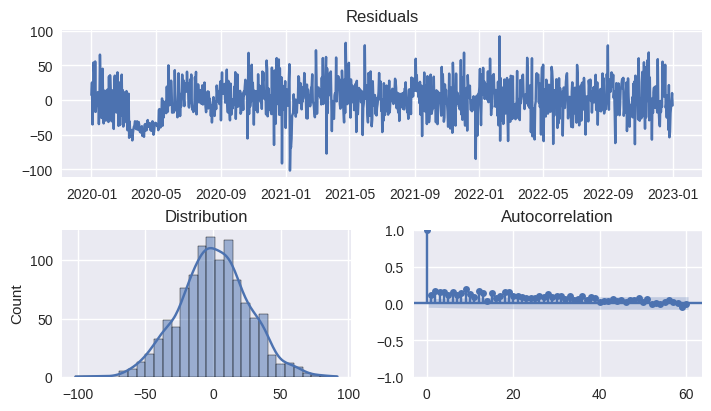

In [ ]:
# Distribución residuos Out-sample
print(pd.Series(np.where(residuos < 0, 'negative', 'positive')).value_counts())
plt.rcParams.update({'font.size': 8})
_ = plot_residuals(residuals=residuos, figsize=(7, 4))

In [ ]:
# Almacenar residuos out-sample en el forecaster

forecaster.set_out_sample_residuals(
    residuals = residuos,
    y_pred    = accidentes_df.loc[predicciones_val.index, 'NUM_ACCIDENTES']
)

In [ ]:
# Backtest con intervalos de predicción para el conjunto de test utilizando los
# residuos out-sample

metrica, predicciones = backtesting_forecaster(
                            forecaster          = forecaster,
                            y                   = accidentes_df['NUM_ACCIDENTES'],
                            exog                = accidentes_df[exog_seleccionadas],
                            steps               = 1,
                            metric              = 'mean_absolute_error',
                            initial_train_size  = len(accidentes_df.loc[:fin_val]),
                            refit               = False,
                            interval            = [10, 90],
                            n_boot              = 250,
                            in_sample_residuals = False, # Se utilizan los residuos out-sample
                            binned_residuals    = True, # Residuos condicionados a los valores predichos
                            n_jobs              = 'auto',
                            verbose             = False,
                            show_progress       = True
                        )
predicciones.head(5)

  0%|          | 0/365 [00:00<?, ?it/s]

,pred,lower_bound,upper_bound
2023-01-01,84.996334,75.534967,123.413066
2023-01-02,117.216655,90.883122,130.445945
2023-01-03,108.332997,78.788115,120.736606
2023-01-04,115.986524,89.652991,129.215814
2023-01-05,129.896662,102.054326,155.757589


In [ ]:
# Gráfico intervalos de predicción vs valores reales

fig = go.Figure([
    go.Scatter(
        name='Predicción',
        x=predicciones.index,
        y=predicciones['pred'],
        mode='lines',
    ),
    go.Scatter(
        name='Valor real',
        x=accidentes_df_test.index,
        y=accidentes_df_test['NUM_ACCIDENTES'],
        mode='lines',
    ),
    go.Scatter(
        name='Upper Bound',
        x=predicciones.index,
        y=predicciones['upper_bound'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=predicciones.index,
        y=predicciones['lower_bound'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
])
fig.update_layout(
    title="Predicción con intervalos de confianza vs valor real",
    xaxis_title="Fecha",
    yaxis_title="Demanda (MWh)",
    width=800,
    height=400,
    margin=dict(l=20, r=20, t=35, b=20),
    hovermode="x",
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.1,
        xanchor="left",
        x=0.001
    )
)
fig.show()

In [ ]:
## Convertir fin_val a Timestamp si es necesario
fin_val = pd.to_datetime(fin_val)

# Asegurar que los índices están alineados
# Esto es crucial para evitar el ValueError
# Suponiendo que 'predicciones' ya tiene las fechas correctas como índice
pred_index_start = predicciones.index[0]

# Filtrar los datos de accidentes a partir del inicio de las predicciones
accidentes_post_fin_val = accidentes_df.loc[pred_index_start:, 'NUM_ACCIDENTES']

# Calcular la cobertura del intervalo
dentro_intervalo = np.where(
    (accidentes_post_fin_val >= predicciones['lower_bound']) & \
    (accidentes_post_fin_val <= predicciones['upper_bound']),
    True,
    False
)

# Calcular la cobertura
cobertura = np.mean(dentro_intervalo)
area = (predicciones['upper_bound'] - predicciones['lower_bound']).sum()

print(f"Área total del intervalo: {round(area, 2)}")
print(f"Cobertura del intervalo predicho: {round(100 * cobertura, 2)}%")


Área total del intervalo: 19186.02
Cobertura del intervalo predicho: 58.08%
